# Assigment 8

In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

In [3]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [4]:
#!pip install mapclassify
import mapclassify

### 8.1. Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.

In [5]:
# Read the content of the file in binary mode ('rb')
with open('../../_data/data_dengue_peru.csv', 'rb') as f:
    data = f.read()
    
# Detect the encoding of the file
detected_encoding = chardet.detect(data)['encoding']

# Assign the detected encoding to a variable
charenc = detected_encoding

# Print the detected encoding
print("La codificación detectada es:", charenc)

La codificación detectada es: UTF-8-SIG


In [6]:
# Import csv file from panel dengue information at department, province, and district level
dengue_data = pd.read_csv( r'../../_data/data_dengue_peru.csv', encoding = charenc,  thousands = ",", dtype= {"Ubigeo":"str"})
dengue_data

Año  Semana Eventos o daños   Departamento       Distrito  \
0       2020      43          Dengue          CUSCO      MEGANTONI   
1       2021      41          Dengue       MOQUEGUA       MOQUEGUA   
2       2021      42          Dengue       MOQUEGUA       MOQUEGUA   
3       2020       1          Dengue          CUSCO      MEGANTONI   
4       2020      53          Dengue          CUSCO      MEGANTONI   
...      ...     ...             ...            ...            ...   
172139  2021      49          Dengue  MADRE DE DIOS  MADRE DE DIOS   
172140  2021      49          Dengue  MADRE DE DIOS      TAHUAMANU   
172141  2021      50          Dengue  MADRE DE DIOS  MADRE DE DIOS   
172142  2021      50          Dengue  MADRE DE DIOS      TAHUAMANU   
172143  2021      51          Dengue  MADRE DE DIOS      TAHUAMANU   

             Provincia  Ubigeo  Casos  
0        LA CONVENCION  080914    2.0  
1       MARISCAL NIETO  180101    NaN  
2       MARISCAL NIETO  180101    NaN  
3        LA CONVENCION  080914    0.0  
4        LA CONVENCION  080914    2.0  
...                ...     ...    ...  
172139            MANU  170203    NaN  
172140       TAHUAMANU  170303    NaN  
172141            MANU  170203    NaN  
172142       TAHUAMANU  170303    NaN  
172143       TAHUAMANU  170303    NaN  

[172144 rows x 8 columns]

### 8.2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

In [7]:
# Generate a column called 'dep_ubigeo' taking the first two digits from the 'Ubigeo' column
dengue_data['dep_ubigeo'] = dengue_data['Ubigeo'].str[:2]

# Generate another column called 'prov_ubigeo' taking the first four digits from the 'Ubigeo' column
dengue_data['prov_ubigeo'] = dengue_data['Ubigeo'].str[:4]

# # Display the 'dengue_data' dataframe with the new columns
dengue_data

Año  Semana Eventos o daños   Departamento       Distrito  \
0       2020      43          Dengue          CUSCO      MEGANTONI   
1       2021      41          Dengue       MOQUEGUA       MOQUEGUA   
2       2021      42          Dengue       MOQUEGUA       MOQUEGUA   
3       2020       1          Dengue          CUSCO      MEGANTONI   
4       2020      53          Dengue          CUSCO      MEGANTONI   
...      ...     ...             ...            ...            ...   
172139  2021      49          Dengue  MADRE DE DIOS  MADRE DE DIOS   
172140  2021      49          Dengue  MADRE DE DIOS      TAHUAMANU   
172141  2021      50          Dengue  MADRE DE DIOS  MADRE DE DIOS   
172142  2021      50          Dengue  MADRE DE DIOS      TAHUAMANU   
172143  2021      51          Dengue  MADRE DE DIOS      TAHUAMANU   

             Provincia  Ubigeo  Casos dep_ubigeo prov_ubigeo  
0        LA CONVENCION  080914    2.0         08        0809  
1       MARISCAL NIETO  180101    NaN         18        1801  
2       MARISCAL NIETO  180101    NaN         18        1801  
3        LA CONVENCION  080914    0.0         08        0809  
4        LA CONVENCION  080914    2.0         08        0809  
...                ...     ...    ...        ...         ...  
172139            MANU  170203    NaN         17        1702  
172140       TAHUAMANU  170303    NaN         17        1703  
172141            MANU  170203    NaN         17        1702  
172142       TAHUAMANU  170303    NaN         17        1703  
172143       TAHUAMANU  170303    NaN         17        1703  

[172144 rows x 10 columns]

### 8.3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

#### 8.3.1 Filter the 'dengue_data' to get only the cases in the year 2021

In [8]:
dengue_casos_2021 = dengue_data[dengue_data['Año'] == 2021]
dengue_casos_2021

Año  Semana Eventos o daños   Departamento                 Distrito  \
1       2021      41          Dengue       MOQUEGUA                 MOQUEGUA   
2       2021      42          Dengue       MOQUEGUA                 MOQUEGUA   
6       2021      41          Dengue           LIMA            INDEPENDENCIA   
7       2021      41          Dengue           LIMA  VILLA MARIA DEL TRIUNFO   
8       2021      41          Dengue           LIMA                      ATE   
...      ...     ...             ...            ...                      ...   
172139  2021      49          Dengue  MADRE DE DIOS            MADRE DE DIOS   
172140  2021      49          Dengue  MADRE DE DIOS                TAHUAMANU   
172141  2021      50          Dengue  MADRE DE DIOS            MADRE DE DIOS   
172142  2021      50          Dengue  MADRE DE DIOS                TAHUAMANU   
172143  2021      51          Dengue  MADRE DE DIOS                TAHUAMANU   

             Provincia  Ubigeo  Casos dep_ubigeo prov_ubigeo  
1       MARISCAL NIETO  180101    NaN         18        1801  
2       MARISCAL NIETO  180101    NaN         18        1801  
6                 LIMA  150112    NaN         15        1501  
7                 LIMA  150143    NaN         15        1501  
8                 LIMA  150103    NaN         15        1501  
...                ...     ...    ...        ...         ...  
172139            MANU  170203    NaN         17        1702  
172140       TAHUAMANU  170303    NaN         17        1703  
172141            MANU  170203    NaN         17        1702  
172142       TAHUAMANU  170303    NaN         17        1703  
172143       TAHUAMANU  170303    NaN         17        1703  

[24857 rows x 10 columns]

#### 8.3.2 Select the relevant columns and create the 'Total_casos' column

In [9]:
total_dengue_casos2021 = dengue_casos_2021.groupby( ['Departamento', 'Provincia','Distrito', 'Ubigeo', 'dep_ubigeo', 'prov_ubigeo'], as_index = False).agg(Total_casos=('Casos', 'sum'))
total_dengue_casos2021

Departamento   Provincia    Distrito  Ubigeo dep_ubigeo prov_ubigeo  \
0       AMAZONAS       BAGUA    ARAMANGO  010202         01        0102   
1       AMAZONAS       BAGUA       BAGUA  010201         01        0102   
2       AMAZONAS       BAGUA    COPALLIN  010203         01        0102   
3       AMAZONAS       BAGUA    EL PARCO  010204         01        0102   
4       AMAZONAS       BAGUA       IMAZA  010205         01        0102   
..           ...         ...         ...     ...        ...         ...   
464      UCAYALI  PADRE ABAD    CURIMANA  250303         25        2503   
465      UCAYALI  PADRE ABAD     IRAZOLA  250302         25        2503   
466      UCAYALI  PADRE ABAD     NESHUYA  250304         25        2503   
467      UCAYALI  PADRE ABAD  PADRE ABAD  250301         25        2503   
468      UCAYALI       PURUS       PURUS  250401         25        2504   

     Total_casos  
0           25.0  
1          474.0  
2           38.0  
3            8.0  
4          109.0  
..           ...  
464         32.0  
465         26.0  
466         14.0  
467        119.0  
468          0.0  

[469 rows x 7 columns]

#### 8.3.3 Upload shape file at district level

In [10]:
distritos_shp = gpd.read_file(r"../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp")
distritos_shp

CCDD    NOMBDEP CCPP    NOMBPROV CCDI      NOMBDIST          CAPITAL  \
0      06  CAJAMARCA   05   CONTUMAZA   04      GUZMANGO         GUZMANGO   
1      06  CAJAMARCA   11  SAN MIGUEL   05      EL PRADO         EL PRADO   
2      06  CAJAMARCA   11  SAN MIGUEL   09        NIEPOS           NIEPOS   
3      06  CAJAMARCA   11  SAN MIGUEL   10  SAN GREGORIO     SAN GREGORIO   
4      06  CAJAMARCA   12   SAN PABLO   03      SAN LUIS  SAN LUIS GRANDE   
...   ...        ...  ...         ...  ...           ...              ...   
1869   04   AREQUIPA   04    CASTILLA   04       CHACHAS          CHACHAS   
1870   04   AREQUIPA   04    CASTILLA   05  CHILCAYMARCA     CHILCAYMARCA   
1871   04   AREQUIPA   04    CASTILLA   06         CHOCO            CHOCO   
1872   04   AREQUIPA   04    CASTILLA   07    HUANCARQUI       HUANCARQUI   
1873   12      JUNIN   06      SATIPO   04      MAZAMARI             None   

      UBIGEO IDPROV  CODIGO  CNT_CCPP    DESCRIPCIO           DESCARGAR  \
0     060504   0605  060504        50      GUZMANGO  www.geogpsperu.com   
1     061105   0611  061105        15      EL PRADO  www.geogpsperu.com   
2     061109   0611  061109        41        NIEPOS  www.geogpsperu.com   
3     061110   0611  061110        48  SAN GREGORIO  www.geogpsperu.com   
4     061203   0612  061203         9      SAN LUIS  www.geogpsperu.com   
...      ...    ...     ...       ...           ...                 ...   
1869  040404   0404  040404        19       CHACHAS  www.geogpsperu.com   
1870  040405   0404  040405        24  CHILCAYMARCA  www.geogpsperu.com   
1871  040406   0404  040406        58         CHOCO  www.geogpsperu.com   
1872  040407   0404  040407        25    HUANCARQUI  www.geogpsperu.com   
1873  120604   1206  120604       152      MAZAMARI  www.geogpsperu.com   

       WHATSAPP                  CONTACTO  \
0     931381206  juan.suyo@geogpsperu.com   
1     931381206  juan.suyo@geogpsperu.com   
2     931381206  juan.suyo@geogpsperu.com   
3     931381206  juan.suyo@geogpsperu.com   
4     931381206  juan.suyo@geogpsperu.com   
...         ...                       ...   
1869  931381206  juan.suyo@geogpsperu.com   
1870  931381206  juan.suyo@geogpsperu.com   
1871  931381206  juan.suyo@geogpsperu.com   
1872  931381206  juan.suyo@geogpsperu.com   
1873  931381206  juan.suyo@geogpsperu.com   

                                               geometry  
0     POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...  
1     POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...  
2     POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...  
3     POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...  
4     POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...  
...                                                 ...  
1869  POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...  
1870  POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...  
1871  POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...  
1872  POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...  
1873  POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...  

[1874 rows x 16 columns]

In [11]:
# Get the column names of the 'distritos_shp' dataframe
distritos_shp.columns

Index(['CCDD', 'NOMBDEP', 'CCPP', 'NOMBPROV', 'CCDI', 'NOMBDIST', 'CAPITAL',
       'UBIGEO', 'IDPROV', 'CODIGO', 'CNT_CCPP', 'DESCRIPCIO', 'DESCARGAR',
       'WHATSAPP', 'CONTACTO', 'geometry'],
      dtype='object')

In [12]:
#Check unique values of the 'UBIGEO' column in the 'distritos_shp'
distritos_shp['UBIGEO'].is_unique

True

In [13]:
# Calculate the size
distritos_shp['UBIGEO'].unique().size

1874

In [14]:
# Select the important columns 'UBIGEO' and 'geometry'
distritos_shp = distritos_shp[['UBIGEO', 'geometry']]

# Rename the column 'UBIGEO' to 'Ubigeo'
distritos_shp = distritos_shp.rename(columns={'UBIGEO':'Ubigeo'})
distritos_shp

Ubigeo                                           geometry
0     060504  POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...
1     061105  POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...
2     061109  POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...
3     061110  POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...
4     061203  POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...
...      ...                                                ...
1869  040404  POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...
1870  040405  POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...
1871  040406  POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...
1872  040407  POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...
1873  120604  POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...

[1874 rows x 2 columns]

In [15]:
#  WGS-84 (longitud-latitud projection) 
distritos_shp.crs
# System of coordenates: CRS (due to where we are)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

###  Merge: 'total_dengue_casos2021' & 'distritos_shp'

In [16]:
# Merge 'distritos_shp' dataFrame with 'total_dengue_casos2021' dataframe based on 'Ubigeo' column, keeping all rows from 'distritos_shp'
dengue_dist_2021 = pd.merge(distritos_shp, total_dengue_casos2021, how='left', on=['Ubigeo'])

# Drop the columns 'Departamento', 'Provincia', and 'Distrito' from the merged dataframe
dengue_dist_2021 = dengue_dist_2021.drop(columns=['Departamento','Provincia','Distrito'])

# Convert the 'Ubigeo' column to integer type after converting it to string to handle potential leading zeros
dengue_dist_2021['Ubigeo'] = dengue_dist_2021['Ubigeo'].astype(str).astype(int)
dengue_dist_2021

Ubigeo                                           geometry dep_ubigeo  \
0      60504  POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...        NaN   
1      61105  POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...        NaN   
2      61109  POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...        NaN   
3      61110  POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...        NaN   
4      61203  POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...        NaN   
...      ...                                                ...        ...   
1869   40404  POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...        NaN   
1870   40405  POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...        NaN   
1871   40406  POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...        NaN   
1872   40407  POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...        NaN   
1873  120604  POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...         12   

     prov_ubigeo  Total_casos  
0            NaN          NaN  
1            NaN          NaN  
2            NaN          NaN  
3            NaN          NaN  
4            NaN          NaN  
...          ...          ...  
1869         NaN          NaN  
1870         NaN          NaN  
1871         NaN          NaN  
1872         NaN          NaN  
1873        1206        193.0  

[1874 rows x 5 columns]

<Axes: >

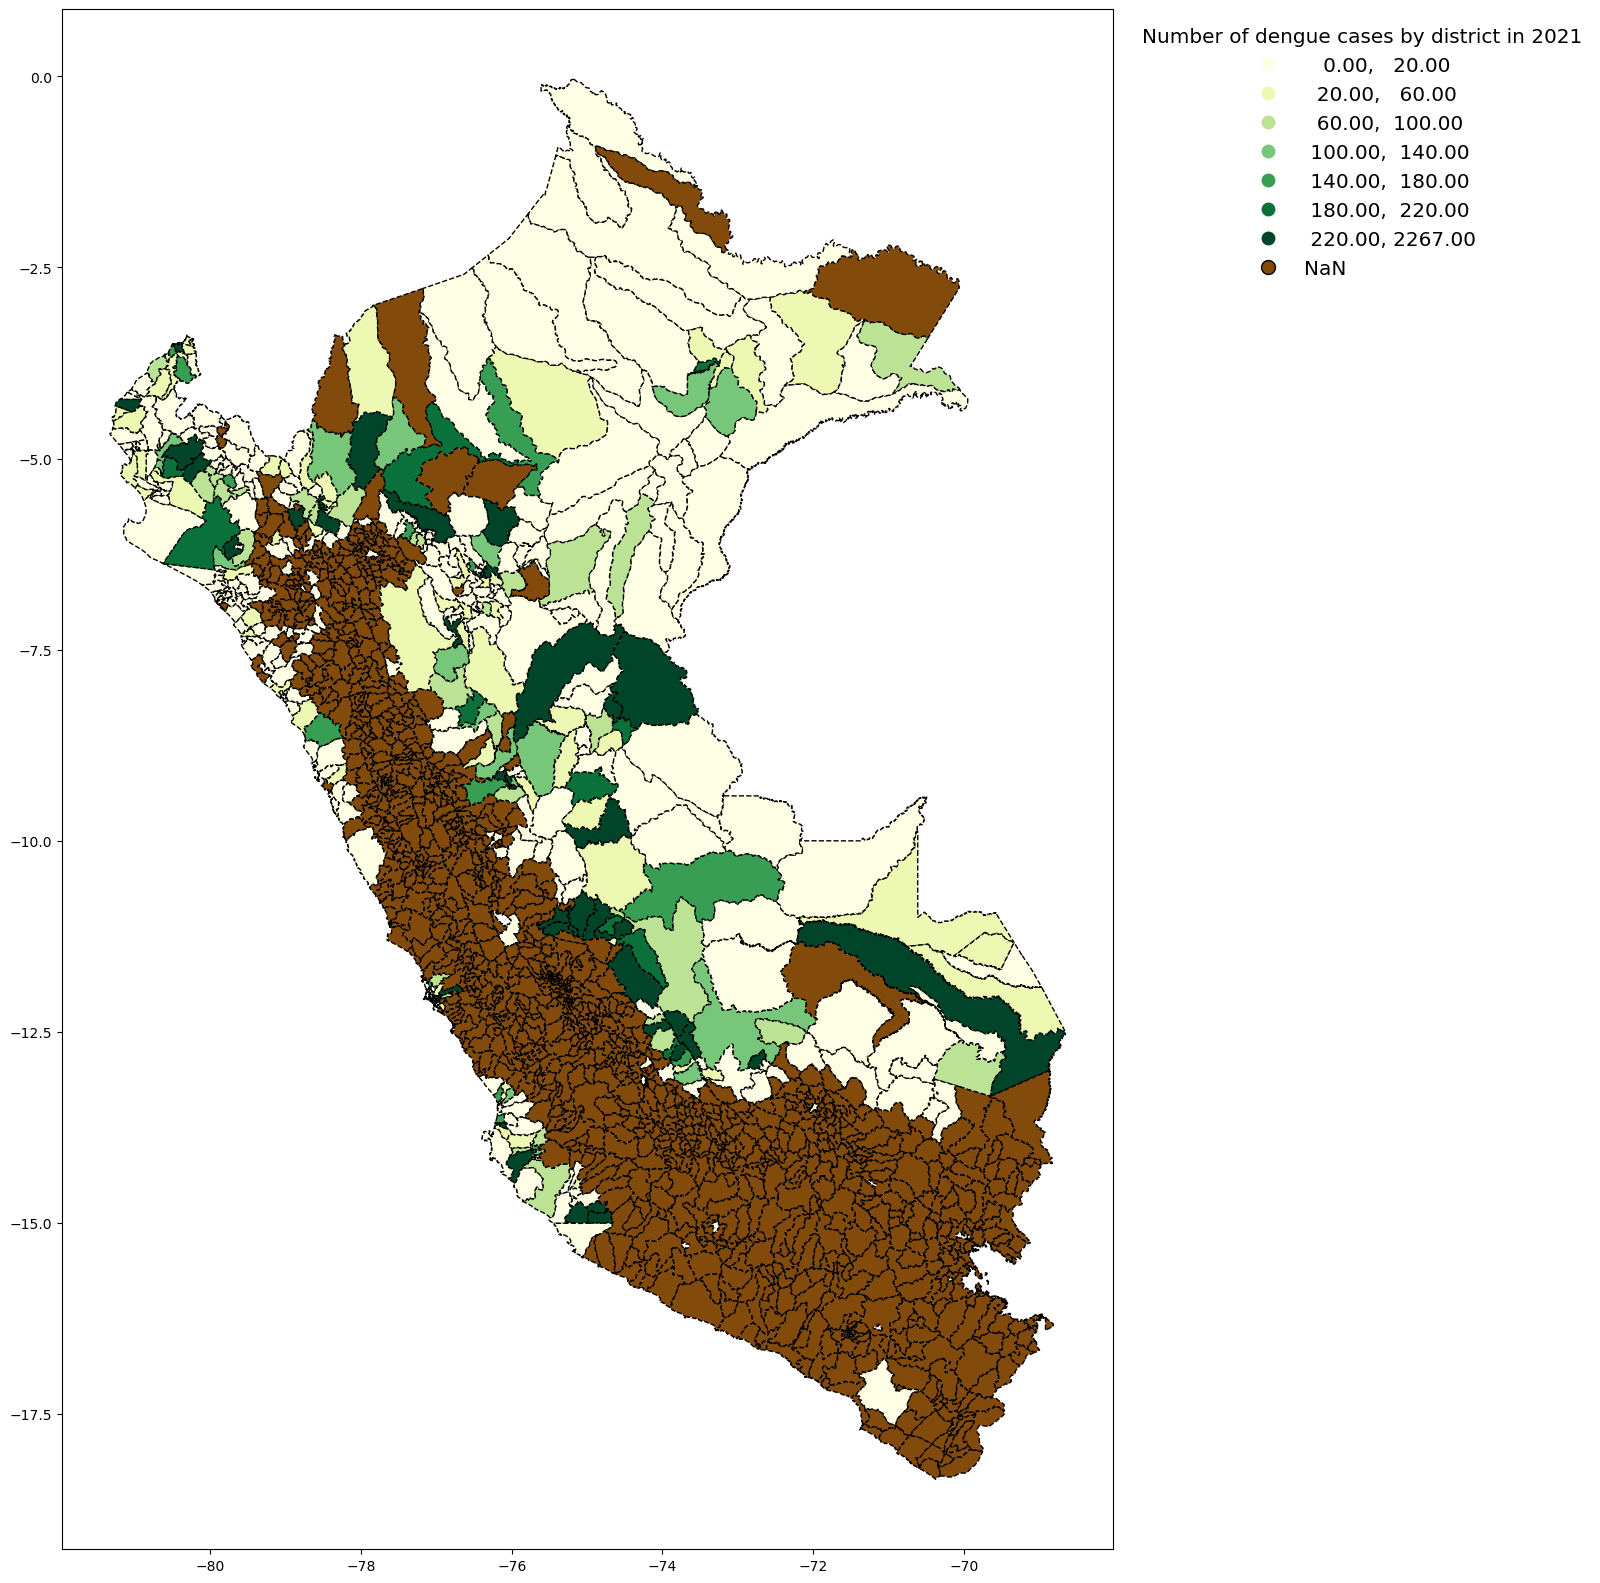

In [17]:
# Plot the'dengue_dist_2021' dataFrame based on the 'Total_casos' column, using the 'Reds' colormap,
# with a specified figure size of 20x20 inches, dashed line style for district boundaries, and black edge color.
# Enable the legend, specifying a user-defined classification scheme with defined bins for data classification.
# Set the color for missing values and specify legend properties such as position, font size, title, and frame.
dengue_dist_2021.plot( column='Total_casos', cmap='YlGn', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True,
              scheme = "User_Defined", 
          missing_kwds= dict(color = "#824b0c",), 
          classification_kwds = dict( bins = [ 20, 60, 100, 140, 180, 220] ), 
          legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of dengue cases by district in 2021", 
                            title_fontsize = 'x-large', 
                            frameon= False ) )

### 8.4. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.

<Axes: >

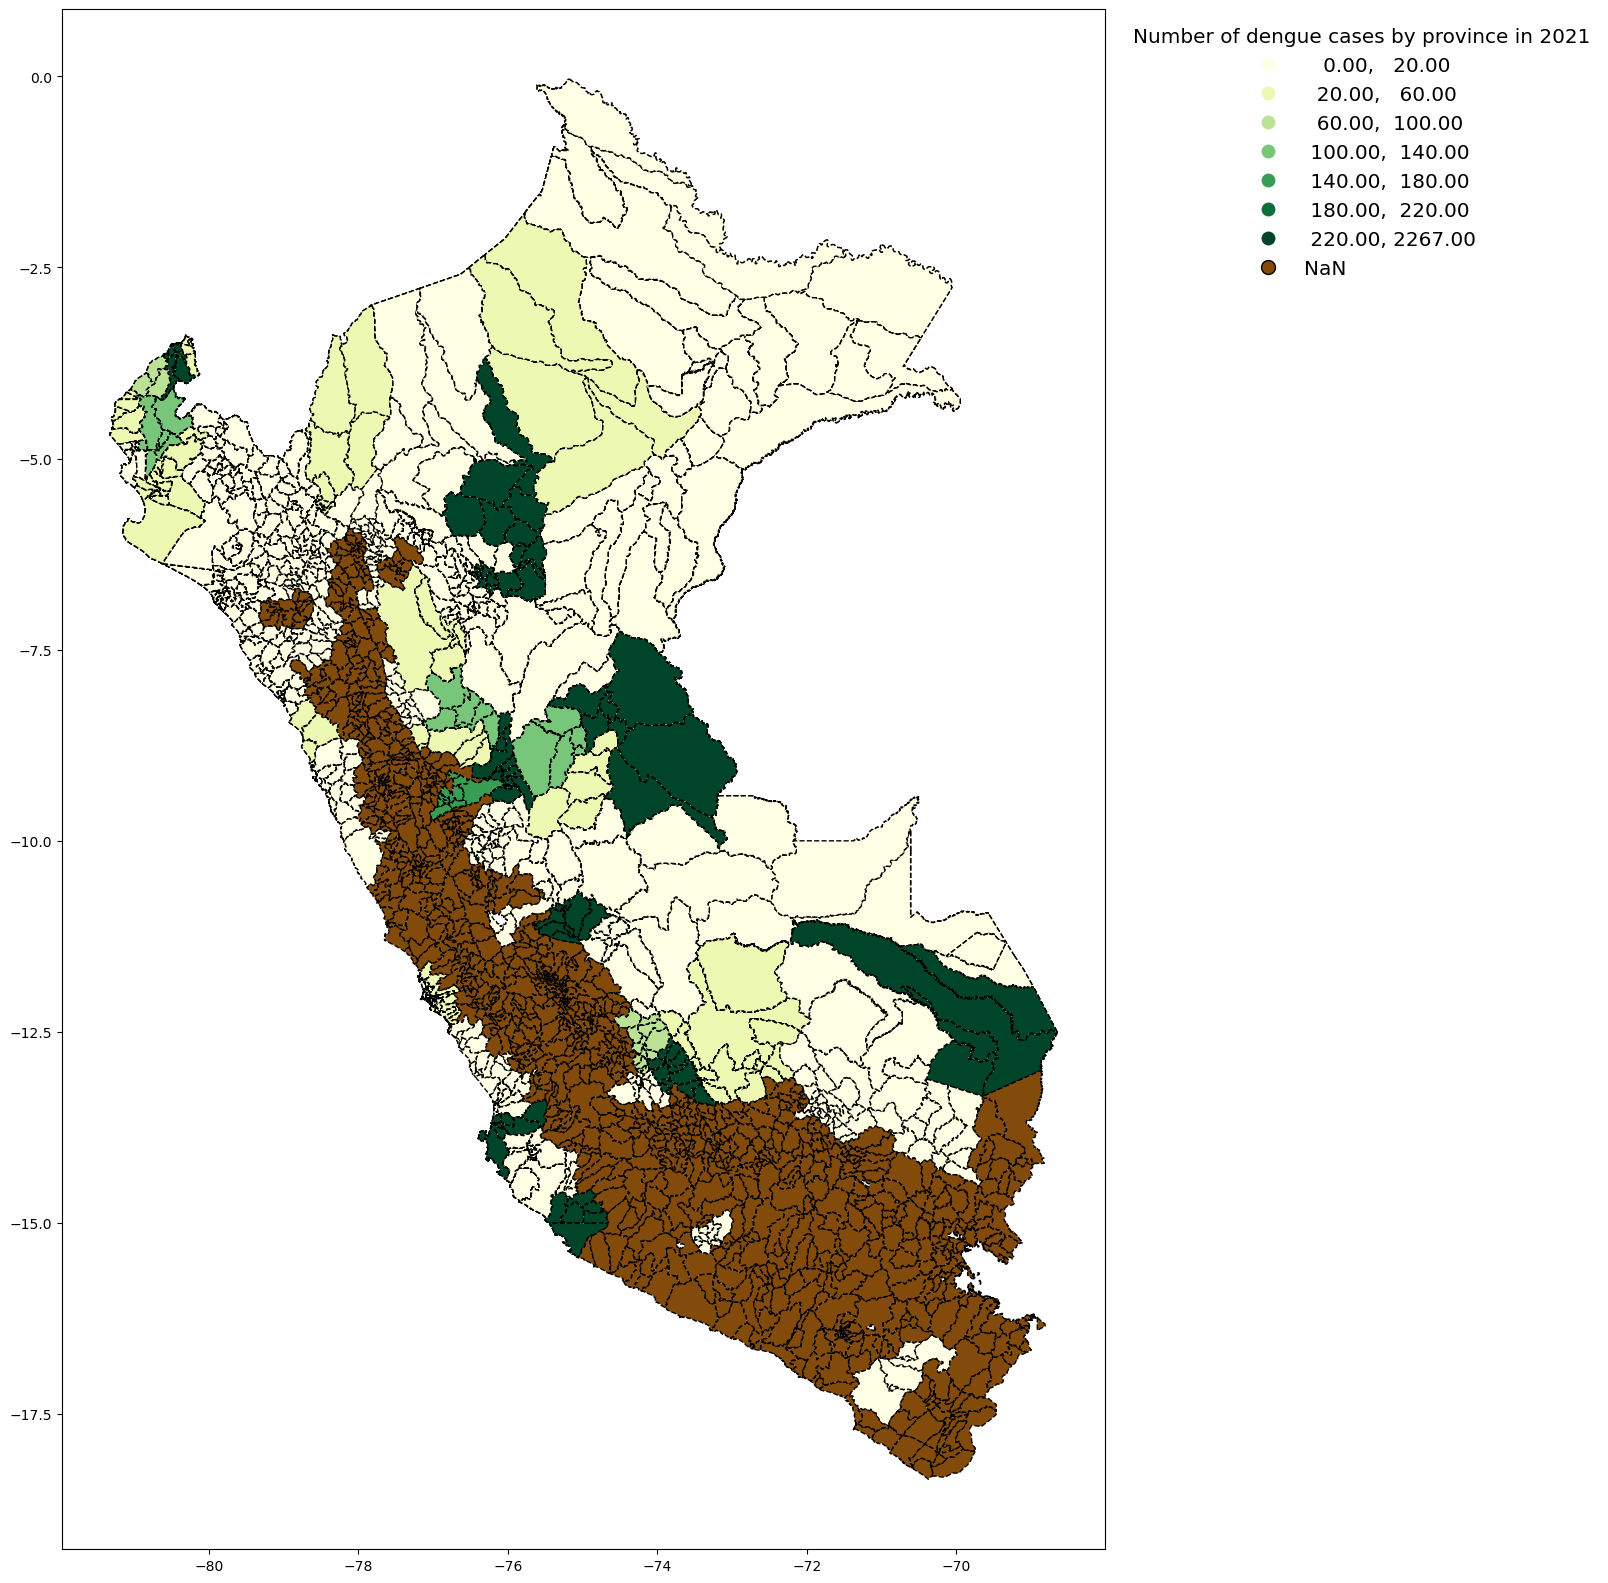

In [18]:
# Filter dengue data for the year 2021
dengue_casos_2021 = dengue_data[dengue_data['Año'] == 2021]

# Aggregate total dengue cases for 2021 by 'Departamento', 'Provincia', 'Distrito', 'Ubigeo', 'dep_ubigeo', and 'prov_ubigeo'
total_dengue_casos2021 = dengue_casos_2021.groupby( ['Departamento', 'Provincia','Distrito', 'Ubigeo', 'dep_ubigeo', 'prov_ubigeo'], as_index = False).agg(Total_casos=('Casos', 'sum'))

# Read district shapefile and select important columns 'UBIGEO', 'IDPROV', and 'geometry'
distritos_shp = gpd.read_file(r"../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp")
distritos_shp = distritos_shp[['UBIGEO', 'IDPROV','geometry']]

# Rename the column 'IDPROV' to 'prov_ubigeo'
distritos_shp = distritos_shp.rename(columns={'IDPROV':'prov_ubigeo'})

# Merge 'total_dengue_casos2021' with 'distritos_shp' based on 'prov_ubigeo'
dengue_prov_2021 = pd.merge(distritos_shp, total_dengue_casos2021, how='left', on=['prov_ubigeo'])

# Plot the merged 'dengue_prov_2021' dataframe with total dengue cases by province in 2021,
# specifying plot aesthetics such as colormap, figure size, line style for district boundaries, etc.
dengue_prov_2021.plot(column='Total_casos', cmap='YlGn', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True,
              scheme = "User_Defined", 
          missing_kwds= dict(color = "#824b0c",), 
          classification_kwds = dict( bins = [ 20, 60, 100, 140, 180, 220] ), 
          legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of dengue cases by province in 2021", 
                            title_fontsize = 'x-large', 
                            frameon= False ) )

### 8.5. Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.

In [19]:
Department_map = gpd.read_file(r"../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp")
Department_map

CCDD    NOMBDEP CCPP    NOMBPROV CCDI      NOMBDIST          CAPITAL  \
0      06  CAJAMARCA   05   CONTUMAZA   04      GUZMANGO         GUZMANGO   
1      06  CAJAMARCA   11  SAN MIGUEL   05      EL PRADO         EL PRADO   
2      06  CAJAMARCA   11  SAN MIGUEL   09        NIEPOS           NIEPOS   
3      06  CAJAMARCA   11  SAN MIGUEL   10  SAN GREGORIO     SAN GREGORIO   
4      06  CAJAMARCA   12   SAN PABLO   03      SAN LUIS  SAN LUIS GRANDE   
...   ...        ...  ...         ...  ...           ...              ...   
1869   04   AREQUIPA   04    CASTILLA   04       CHACHAS          CHACHAS   
1870   04   AREQUIPA   04    CASTILLA   05  CHILCAYMARCA     CHILCAYMARCA   
1871   04   AREQUIPA   04    CASTILLA   06         CHOCO            CHOCO   
1872   04   AREQUIPA   04    CASTILLA   07    HUANCARQUI       HUANCARQUI   
1873   12      JUNIN   06      SATIPO   04      MAZAMARI             None   

      UBIGEO IDPROV  CODIGO  CNT_CCPP    DESCRIPCIO           DESCARGAR  \
0     060504   0605  060504        50      GUZMANGO  www.geogpsperu.com   
1     061105   0611  061105        15      EL PRADO  www.geogpsperu.com   
2     061109   0611  061109        41        NIEPOS  www.geogpsperu.com   
3     061110   0611  061110        48  SAN GREGORIO  www.geogpsperu.com   
4     061203   0612  061203         9      SAN LUIS  www.geogpsperu.com   
...      ...    ...     ...       ...           ...                 ...   
1869  040404   0404  040404        19       CHACHAS  www.geogpsperu.com   
1870  040405   0404  040405        24  CHILCAYMARCA  www.geogpsperu.com   
1871  040406   0404  040406        58         CHOCO  www.geogpsperu.com   
1872  040407   0404  040407        25    HUANCARQUI  www.geogpsperu.com   
1873  120604   1206  120604       152      MAZAMARI  www.geogpsperu.com   

       WHATSAPP                  CONTACTO  \
0     931381206  juan.suyo@geogpsperu.com   
1     931381206  juan.suyo@geogpsperu.com   
2     931381206  juan.suyo@geogpsperu.com   
3     931381206  juan.suyo@geogpsperu.com   
4     931381206  juan.suyo@geogpsperu.com   
...         ...                       ...   
1869  931381206  juan.suyo@geogpsperu.com   
1870  931381206  juan.suyo@geogpsperu.com   
1871  931381206  juan.suyo@geogpsperu.com   
1872  931381206  juan.suyo@geogpsperu.com   
1873  931381206  juan.suyo@geogpsperu.com   

                                               geometry  
0     POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...  
1     POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...  
2     POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...  
3     POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...  
4     POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...  
...                                                 ...  
1869  POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...  
1870  POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...  
1871  POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...  
1872  POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...  
1873  POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...  

[1874 rows x 16 columns]

In [20]:
dengue_dpt_all = dengue_data.groupby(['Departamento','Año'], as_index = False )[ [ 'Casos' ] ].sum()
departments = dengue_dpt_all['Departamento'].unique().tolist()
departments = set(departments)
d = Department_map['NOMBDEP'].unique().tolist()
d = set(d)
missing = list(sorted(d - departments))
years = dengue_dpt_all['Año'].unique().tolist()

In [21]:
rows = []
for miss_dpt in missing:
    for year in years:
        rows.append([miss_dpt, year, np.nan])

In [22]:
missing_departments = pd.DataFrame(rows, columns=['Departamento', 'Año', 'Casos'])
dengue_dpt_all = dengue_dpt_all._append(missing_departments,ignore_index=True)
dengue_dpt_all = dengue_dpt_all.sort_values('Departamento', ascending=True)
dengue_dpt_all

Departamento   Año   Casos
0       AMAZONAS  2015    37.0
1       AMAZONAS  2016    90.0
2       AMAZONAS  2017    93.0
3       AMAZONAS  2018   109.0
4       AMAZONAS  2019   164.0
..           ...   ...     ...
143      UCAYALI  2018   317.0
142      UCAYALI  2017   779.0
141      UCAYALI  2016  1007.0
146      UCAYALI  2021  1613.0
140      UCAYALI  2015   350.0

[175 rows x 3 columns]

In [23]:
dpt_map = Department_map.merge(dengue_dpt_all, left_on='NOMBDEP', right_on='Departamento', how='left')

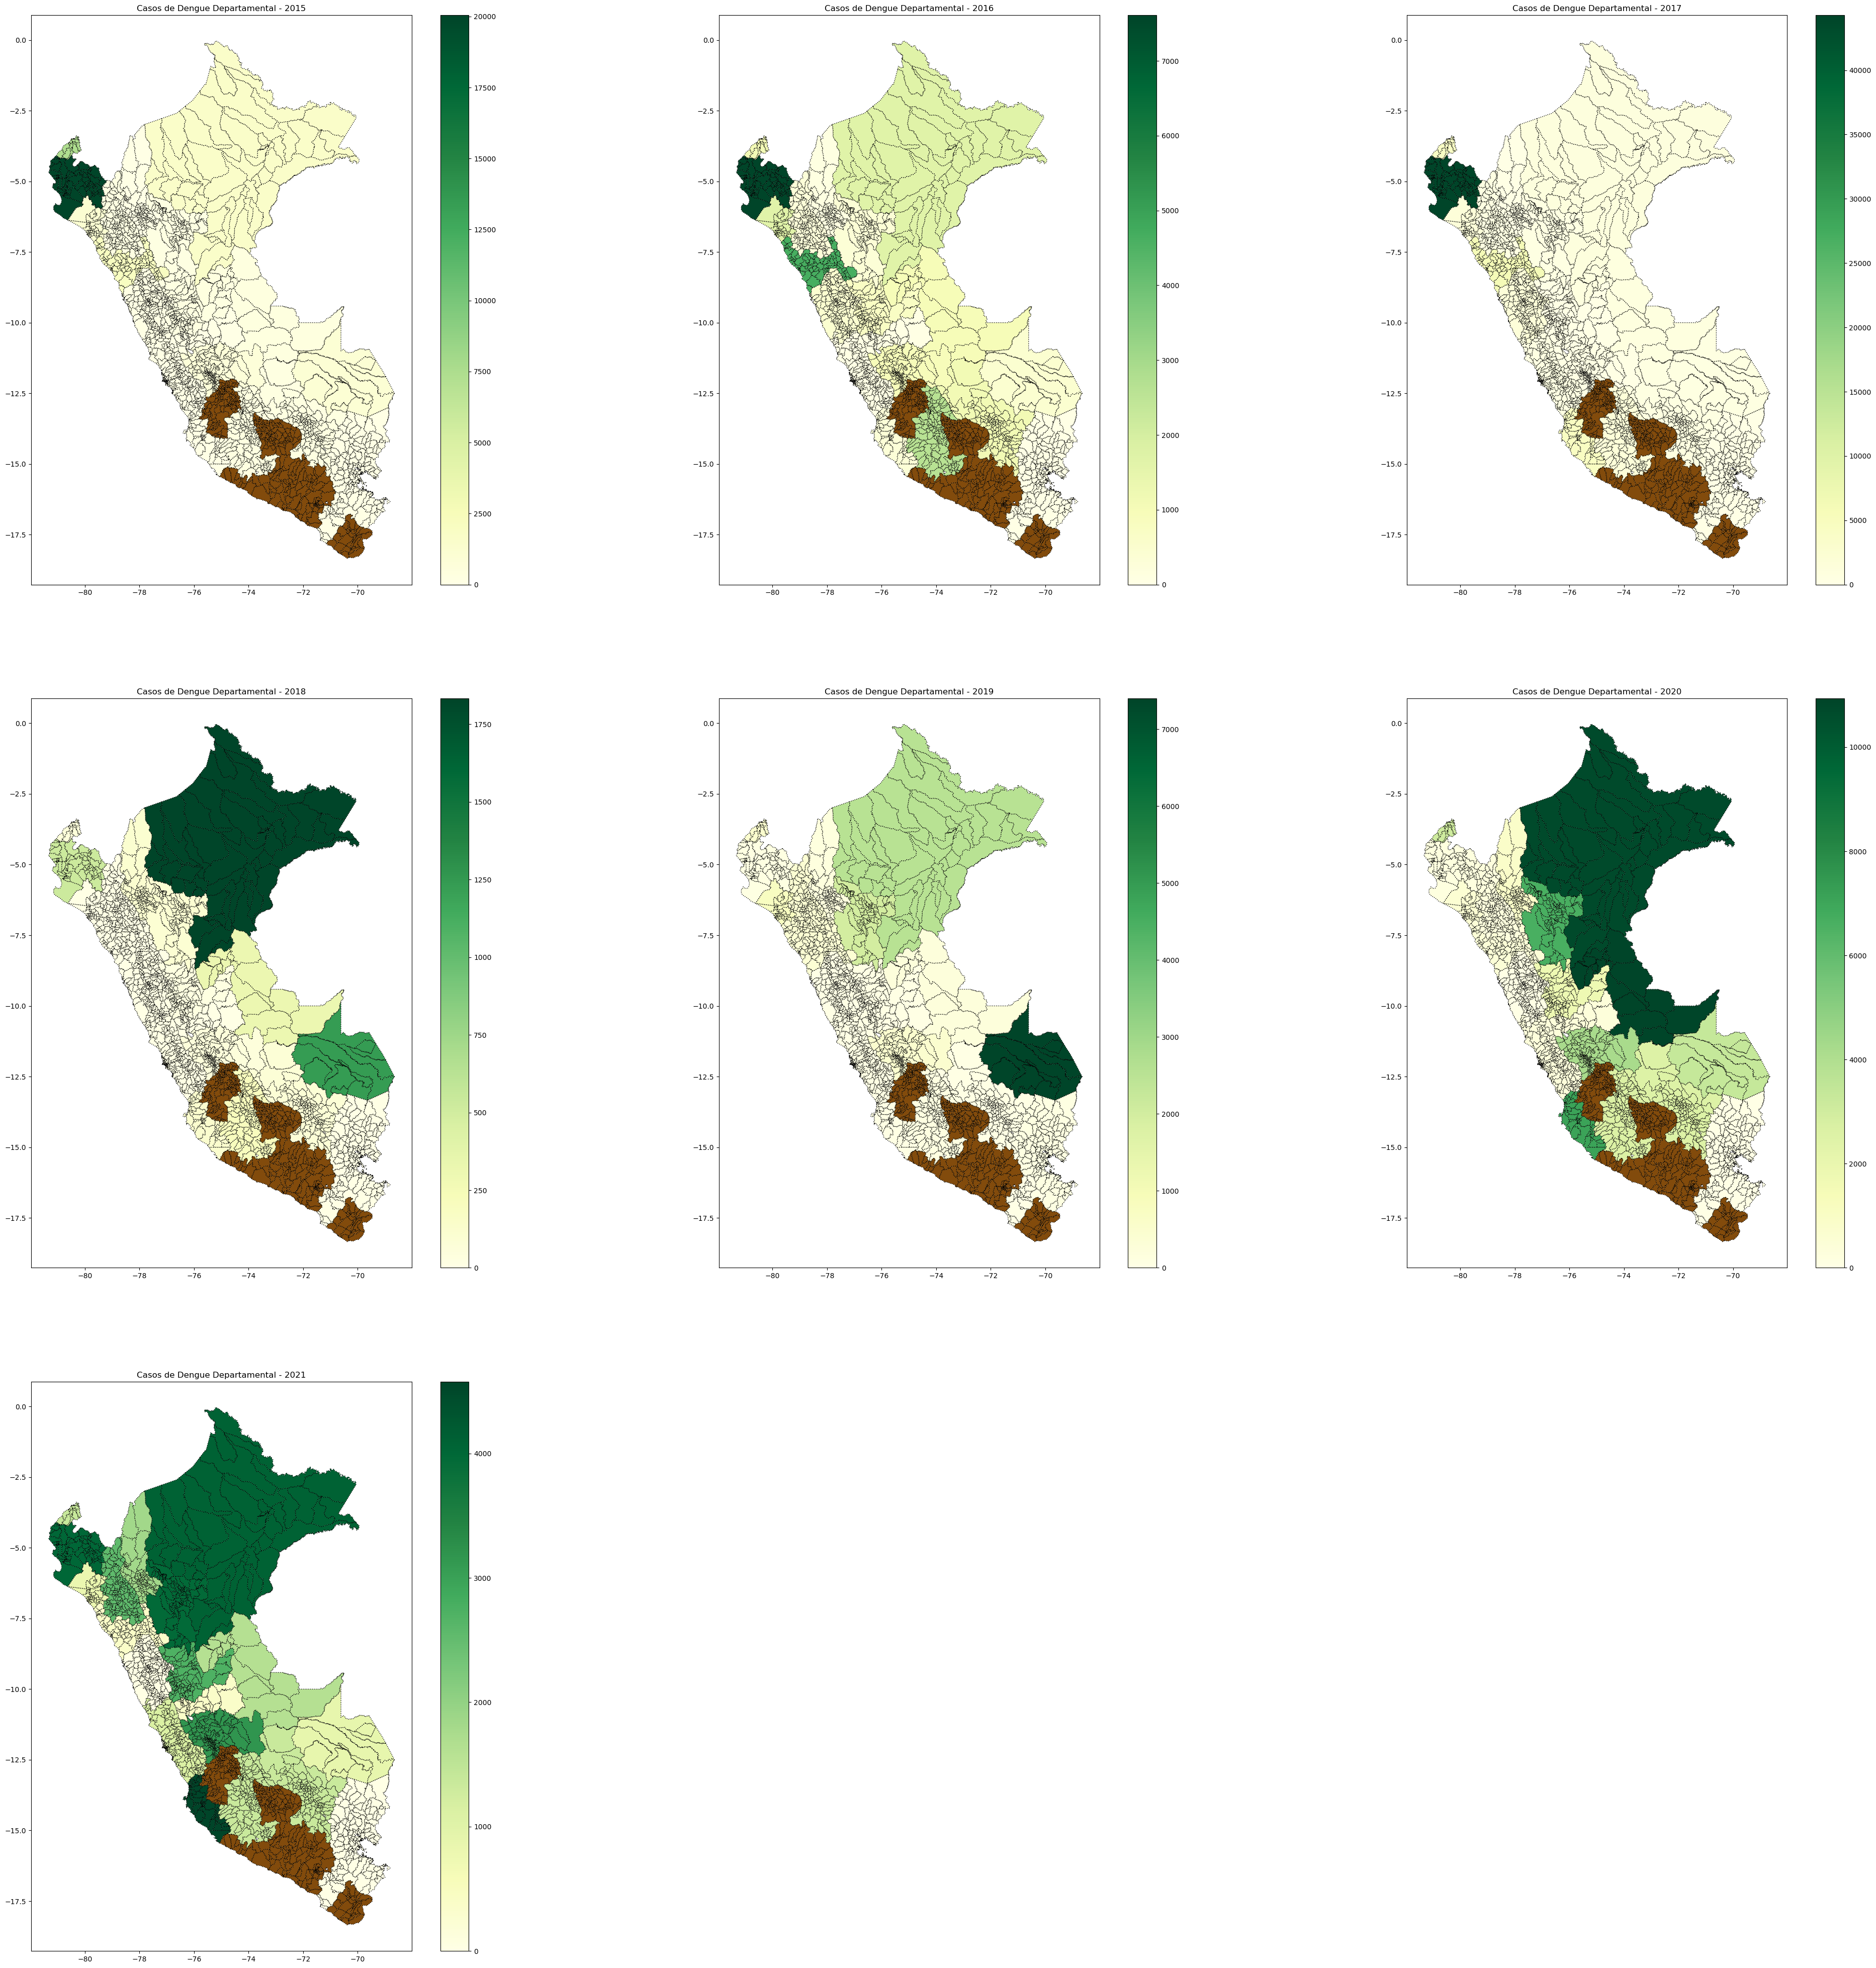

In [24]:
years = dengue_dpt_all['Año'].unique().tolist()
fig, axes = plt.subplots(3, 3, figsize=(50,50))

for ax, year in zip(axes.ravel(), years):
    cmap = plt.cm.Blues
    dpt_map[dpt_map['Año'] == year].plot( figsize = (50,50), column = 'Casos', cmap = "YlGn", linestyle = 'dotted', edgecolor = 'black', legend = True, missing_kwds = dict( color = '#824b0c' ), ax=ax )
    ax.set_title('Casos de Dengue Departamental - {}'.format(year))

axes.flat[7].set_visible(False)
axes.flat[8].set_visible(False)

### 8.6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters

In [30]:
# Read the dengue data.
dengue_data = pd.read_csv('../../_data/data_dengue_peru.csv', encoding='utf-8', thousands=',', dtype={"Ubigeo": "str"})

# Generate 'dep_ubigeo' and 'prov_ubigeo' columns.
dengue_data['dep_ubigeo'] = dengue_data['Ubigeo'].str[:2]
dengue_data['prov_ubigeo'] = dengue_data['Ubigeo'].str[:4]

# Filter data for the year 2021.
dengue_casos_2021 = dengue_data[dengue_data['Año'] == 2021]


In [31]:
# Read the shapefile containing district boundaries.
distritos_shp = gpd.read_file(r"../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp")

# Select important columns: 'UBIGEO', 'IDPROV', 'CCDD', and 'geometry'.
distritos_shp = distritos_shp[['UBIGEO', 'IDPROV', 'CCDD', 'geometry']]

# Rename the 'CCDD' column to 'dep_ubigeo'.
distritos_shp = distritos_shp.rename(columns={'CCDD':'dep_ubigeo'})


In [32]:
def Q_id( n_week ):
    if n_week < 14:
        quarter = 1
    elif 14 <= n_week < 27:
        quarter = 2
    elif 27 <= n_week < 40:
        quarter = 3
    elif n_week >= 40:
        quarter = 4
    else: 
        quarter = float( "nan" )
    return quarter

/var/folders/wt/06417njn63n8t03ry7nyf_wh0000gn/T/ipykernel_65858/353104980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_casos_2021['Q'] = dengue_casos_2021.apply(lambda row: Q_id(row['Semana']), axis=1)


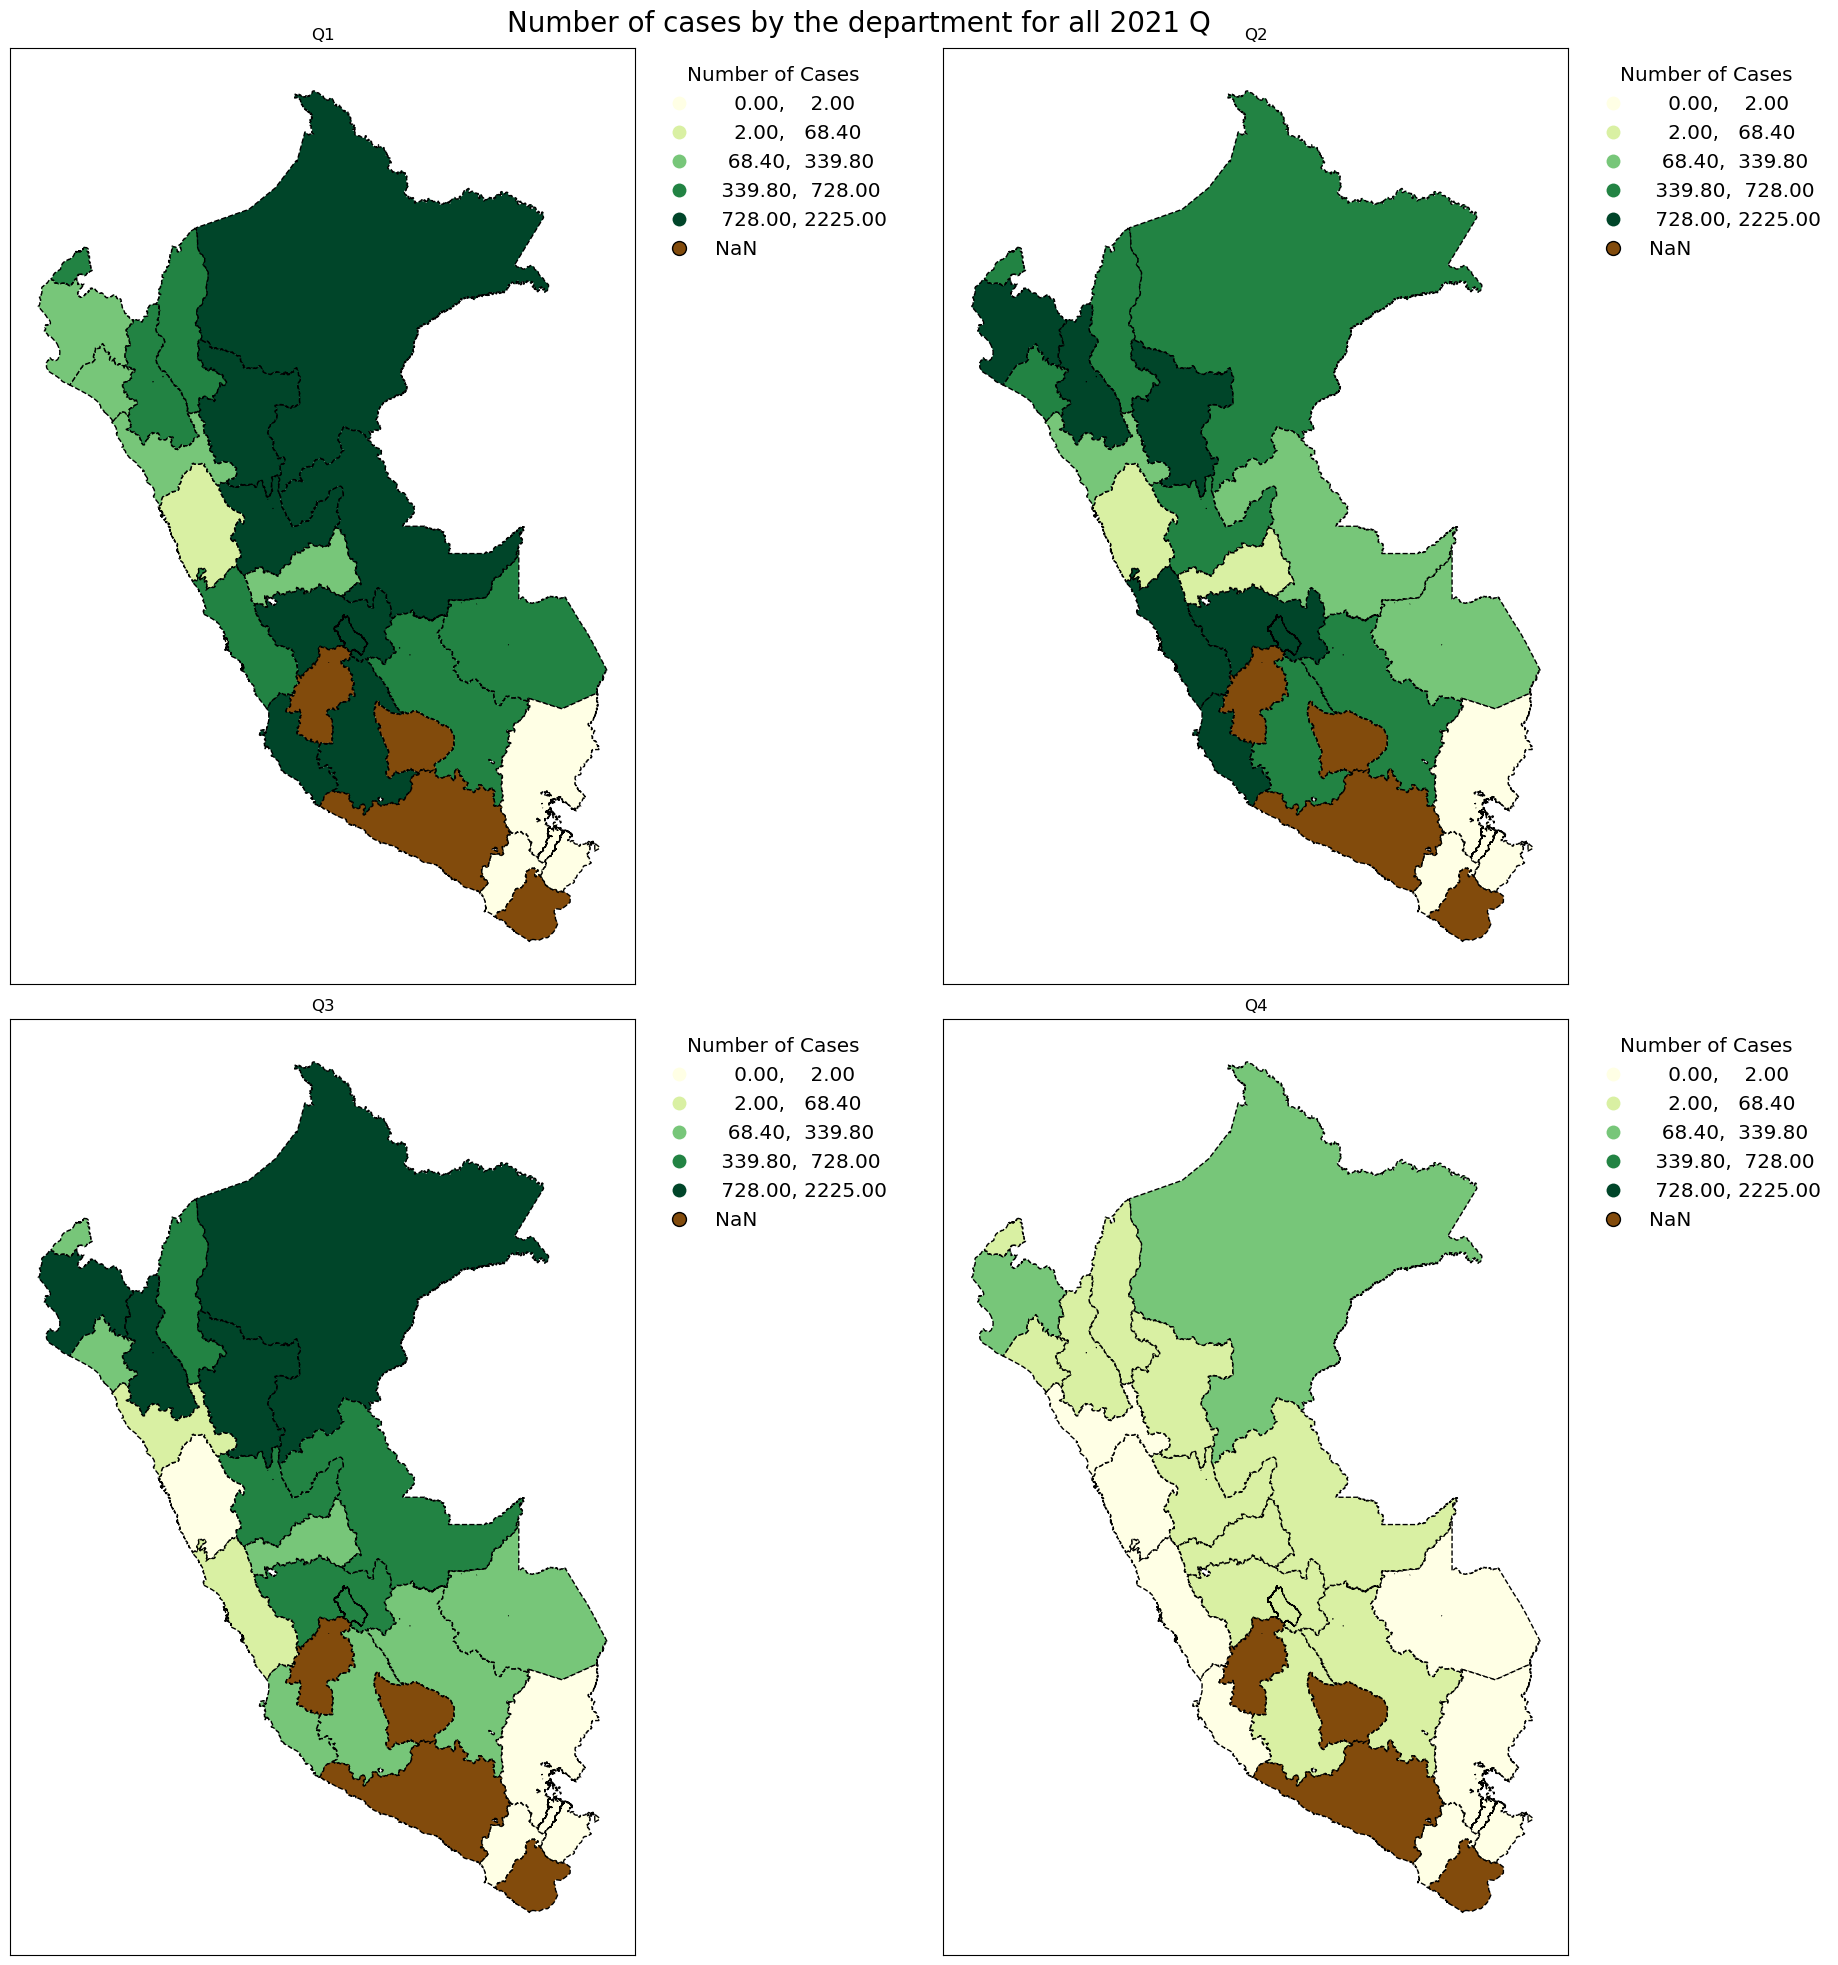

In [34]:
# Create a new column 'Q' based on the 'Semana' column using the Q_id function.
dengue_casos_2021['Q'] = dengue_casos_2021.apply(lambda row: Q_id(row['Semana']), axis=1)

# Group data by 'Q' and 'dep_ubigeo' and sum the 'Casos' column.
dengue_Q = dengue_casos_2021.groupby(['Q', 'dep_ubigeo'], as_index=False)[['Casos']].sum()

# Dissolve the district boundaries shapefile by 'dep_ubigeo'.
dep_shp = distritos_shp.dissolve(by='dep_ubigeo', as_index=False)

# Merge dissolved shapefile with dengue data based on 'dep_ubigeo'.
denguemap = dep_shp.merge(dengue_Q, left_on='dep_ubigeo', right_on='dep_ubigeo', how='left', validate='1:m')

# Define bins for data classification.
bins = pd.qcut(denguemap['Casos'], 5, retbins=True)[1][1:]

# Create subplots for each quarter.
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# Iterate over quarters and plot on each subplot.
idx = 0
for i in range(2):
    for j in range(2):
        ax = axis[i][j]
        quarter = denguemap.Q.unique()[idx]
        dg_temp = denguemap[((denguemap['Q'] == quarter) | (denguemap['Q'].isna()))]
        dg_temp.plot(column='Casos', cmap='YlGn', linestyle='--', edgecolor='black', ax=ax, legend=True,
                     scheme='User_defined',
                     missing_kwds=dict(color='#824b0c'),
                     classification_kwds=dict(bins=bins),
                     legend_kwds=dict(loc='upper left', bbox_to_anchor=(1.01, 1), title='Number of Cases',
                                      frameon=False, fontsize='x-large', title_fontsize='x-large'))
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        ax.set_title(f"Q{str(quarter)[0]}")
        idx = idx + 1

# Set a common title for all subplots.
fig.suptitle('Number of cases by the department for all 2021 Q', fontsize=20)
fig.tight_layout()
